In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Load the Titanic dataset
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

## Detection of Outliers

### IQR method
Let's get the fare column and calculate the interquartile range (IQR).

IQR is a measure of the variability of a data set and is used to identify outliers. Outliers are data points that are significantly outside the range of the majority of the data.

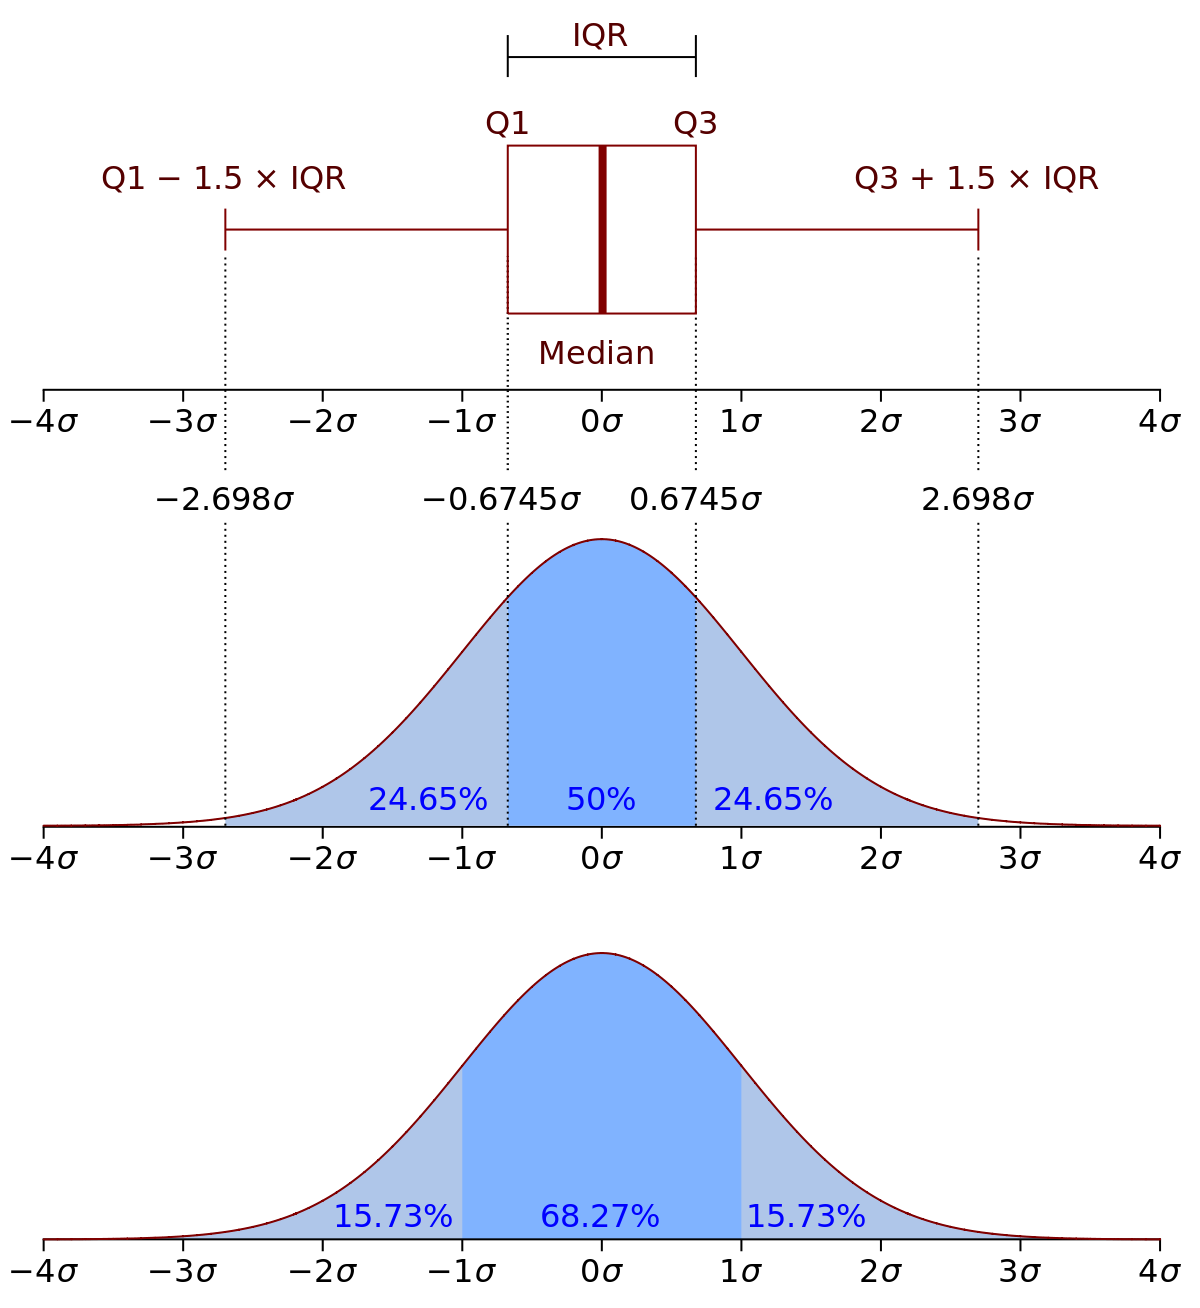


We're defining the lower and upper bounds for outliers.

The lower bound is calculated by subtracting 1.5 times the IQR from the first quartile (q1), and the upper bound is calculated by adding 1.5 times the IQR to the third quartile (q3).

Any data points that are below the lower bound or above the upper bound are considered outliers.

In [ ]:
# Get the fare column
fare = df["Fare"]

<Axes: ylabel='Frequency'>

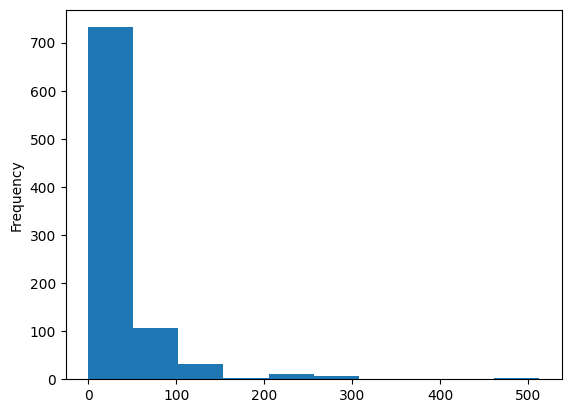

In [ ]:
# Plot the distribution of the fare
fare.plot(kind="hist")

In [ ]:
# Calculate the interquartile range (IQR)
q1 = fare.quantile(0.25)
q3 = fare.quantile(0.75)
iqr = q3 - q1
print("Quartile 1: ", q1)
print("Quartile 3: ", q3)
print("IQR: ", iqr)

Quartile 1:  7.9104
Quartile 3:  31.0
IQR:  23.0896


In [ ]:
# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the outliers
outliers = fare.loc[(fare < lower_bound) | (fare > upper_bound)]
outliers

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

### Z-Score method
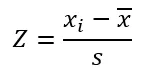

The z-score corresponding to each data point represents the distance from the center in terms of standard deviation.
- For example, a z-score of 2.5 indicates that the data point is 2.5 standard deviation away from the mean.

Usually z-score=3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method.

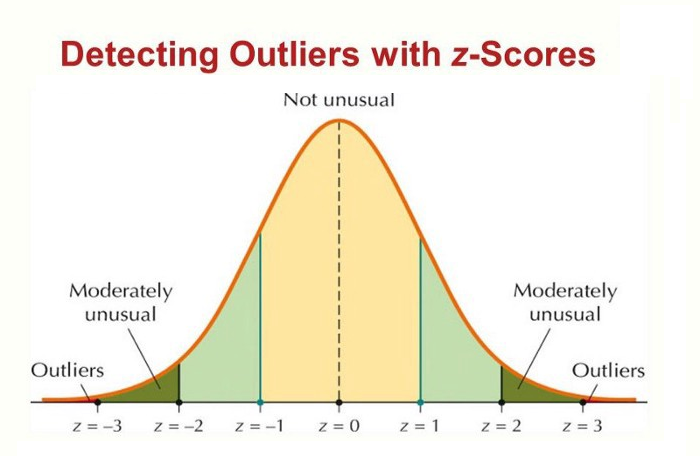

In [ ]:
df_fare = pd.DataFrame(df.Fare)
m = np.mean(df_fare.Fare)
s = np.std(df_fare.Fare)
print("Average fare: ", m)
print("Stdev fare: ", s)

Average fare:  32.204207968574636
Stdev fare:  49.6655344447741


In [ ]:
df_fare['Z-score'] = (df_fare.Fare - m)/s
df_fare.head()

,Fare,Z-score
0,7.2500,-0.502445
1,71.2833,0.786845
2,7.9250,-0.488854
3,53.1000,0.420730
4,8.0500,-0.486337


In [ ]:
df_outlier = df_fare[(df_fare['Z-score']>3)|(df_fare['Z-score']<-3)]
df_outlier

,Fare,Z-score
27,263.0000,4.647001
88,263.0000,4.647001
118,247.5208,4.335332
258,512.3292,9.667167
299,247.5208,4.335332
311,262.3750,4.634417
341,263.0000,4.647001
377,211.5000,3.610065
380,227.5250,3.932723
438,263.0000,4.647001


### Outlier Detection with Boxplot

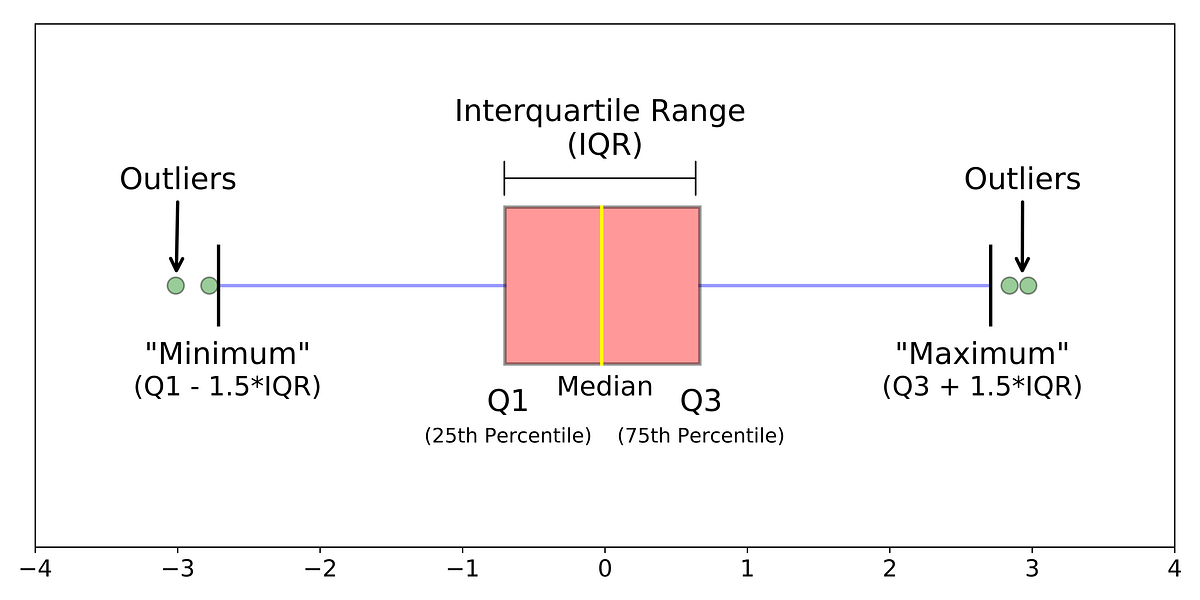

<Axes: >

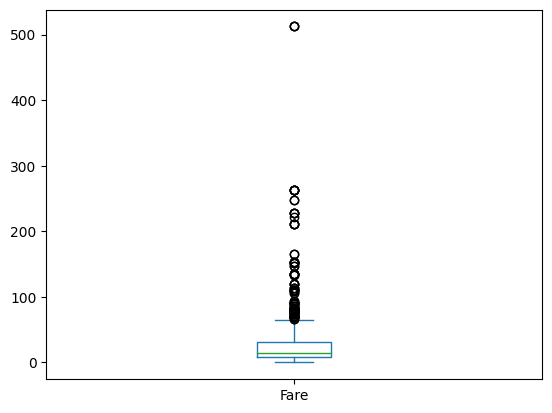

In [ ]:
fare.plot(kind="box")

#### To-do exercise for trainees: Examine the outliers in fare attribute with respect to the passenger class and identify whether the results are different from the above analyses.

In [ ]:
class_df = df[["Pclass","Fare"]]
class_df.head()

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500


<Axes: xlabel='Pclass', ylabel='Fare'>

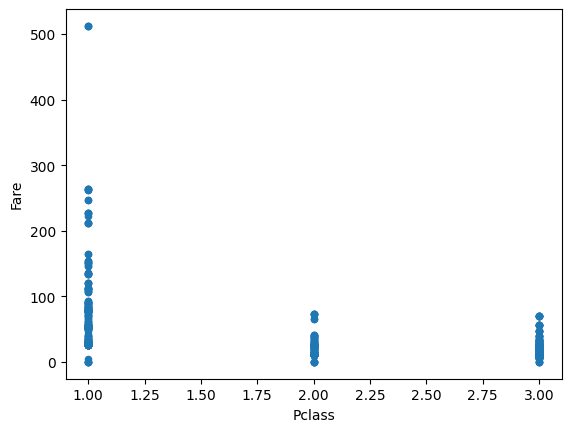

In [ ]:
class_df.plot(x='Pclass', y='Fare', kind='scatter')

The first class passenger fares have some extreme values which is intuitive since the amenities offered for them would be higher than the rest, resulting in a huge range of fare. Let's look at class 1 in detail.

In [ ]:
class_1 = class_df[class_df['Pclass']==1]
class_1['Fare'].min()

0.0

In [ ]:
# analyzing original df
df[(df['Fare']==0.0) & (df['Pclass']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_capped
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0.0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0.0
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,0.0
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,0.0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,0.0


The passenger fare may have been misplaced for these passengers, or possibly they're the crew aboard the ship (high probability for the latter assumption)

In [ ]:
class_1['Fare'].max()

512.3292

<Axes: ylabel='Frequency'>

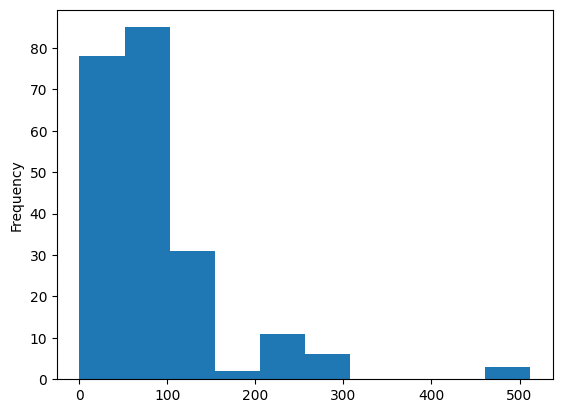

In [ ]:
class_1['Fare'].plot(kind="hist")

In [ ]:
# Calculate the interquartile range (IQR)
q1 = class_1['Fare'].quantile(0.25)
q3 = class_1['Fare'].quantile(0.75)
iqr = q3 - q1
print("Quartile 1: ", q1)
print("Quartile 3: ", q3)
print("IQR: ", iqr)

Quartile 1:  30.923949999999998
Quartile 3:  93.5
IQR:  62.57605


In [ ]:
# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the outliers
outliers = class_1['Fare'].loc[(class_1['Fare'] < lower_bound) | (class_1['Fare'] > upper_bound)]
outliers

27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64

In [ ]:
class_2 = class_df[class_df['Pclass']==2]
class_2['Fare'].max()

73.5

<Axes: >

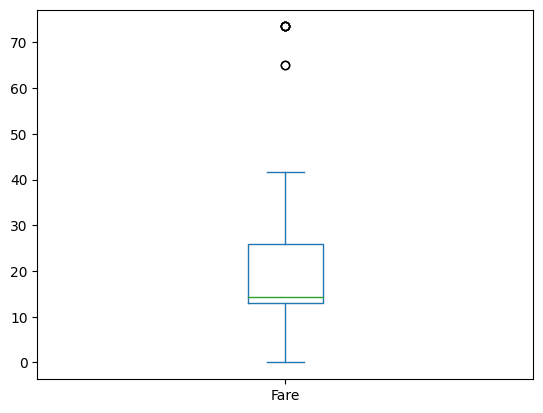

In [ ]:
class_2['Fare'].plot(kind='box')

In [ ]:
# Calculate the interquartile range (IQR)
q1 = class_2['Fare'].quantile(0.25)
q3 = class_2['Fare'].quantile(0.75)
iqr = q3 - q1
print("Quartile 1: ", q1)
print("Quartile 3: ", q3)
print("IQR: ", iqr)

Quartile 1:  13.0
Quartile 3:  26.0
IQR:  13.0


In [ ]:
# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the outliers
outliers = class_2['Fare'].loc[(class_2['Fare'] < lower_bound) | (class_2['Fare'] > upper_bound)]
outliers

72     73.5
120    73.5
385    73.5
615    65.0
655    73.5
665    73.5
754    65.0
Name: Fare, dtype: float64

In [ ]:
class_3 = class_df[class_df['Pclass']==3]
class_3['Fare'].max()

69.55

<Axes: >

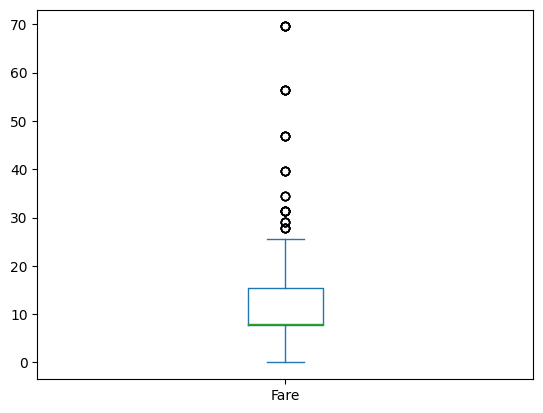

In [ ]:
class_3['Fare'].plot(kind='box')

In [ ]:
# Calculate the interquartile range (IQR)
q1 = class_3['Fare'].quantile(0.25)
q3 = class_3['Fare'].quantile(0.75)
iqr = q3 - q1
print("Quartile 1: ", q1)
print("Quartile 3: ", q3)
print("IQR: ", iqr)

Quartile 1:  7.75
Quartile 3:  15.5
IQR:  7.75


In [ ]:
# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the outliers
outliers = class_3['Fare'].loc[(class_3['Fare'] < lower_bound) | (class_3['Fare'] > upper_bound)]
outliers

13     31.2750
16     29.1250
25     31.3875
50     39.6875
59     46.9000
63     27.9000
71     46.9000
74     56.4958
86     34.3750
119    31.2750
147    34.3750
159    69.5500
164    39.6875
167    27.9000
169    56.4958
171    29.1250
180    69.5500
182    31.3875
201    69.5500
233    31.3875
261    31.3875
266    39.6875
278    29.1250
324    69.5500
360    27.9000
386    46.9000
436    34.3750
480    46.9000
509    56.4958
541    31.2750
542    31.2750
610    31.2750
634    27.9000
638    39.6875
642    27.9000
643    56.4958
678    46.9000
683    46.9000
686    39.6875
692    56.4958
736    34.3750
787    29.1250
792    69.5500
813    31.2750
819    27.9000
824    39.6875
826    56.4958
838    56.4958
846    69.5500
850    31.2750
863    69.5500
885    29.1250
Name: Fare, dtype: float64

## Outlier Treatment


In [ ]:
# Option 1: Drop the outliers
df_drop = df.loc[fare.between(lower_bound, upper_bound)]
df_drop.shape

(775, 12)

In [ ]:
# Option 2: Cap the outliers
df["fare_capped"] = np.where(df.Fare > upper_bound, upper_bound,
                        np.where(df.Fare < lower_bound, lower_bound, df['Fare']))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_capped
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,65.6344
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500


In [ ]:
df.shape

(891, 13)

<Axes: ylabel='Frequency'>

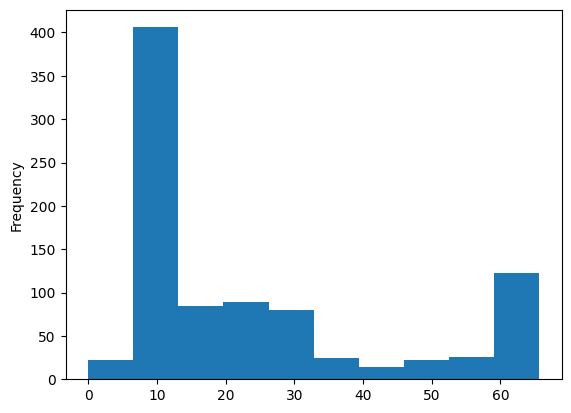

In [ ]:
# Plot the distribution of the fare after treating the outliers
df['fare_capped'].plot(kind="hist")

<Axes: >

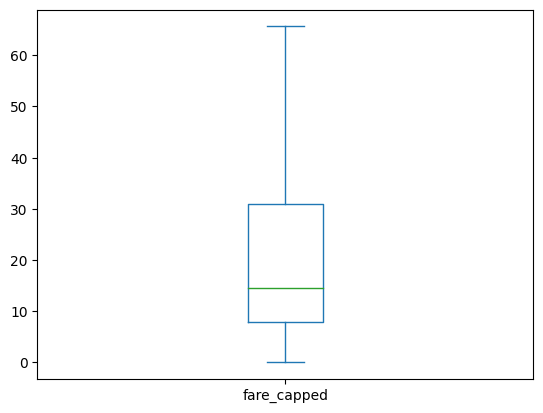

In [ ]:
df['fare_capped'].plot(kind="box")